<a href="https://colab.research.google.com/github/NikolayLenkovNikolaev/PBPK-QSP/blob/main/Course_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introductuion to Bayesian statistical principles and moethods

Bayesian principles and methods provide a coherent framework for:
- quantifying uncertainty
- making inferences in the presence of that uncertainty

It is also the basi for formal approaches to incremental model building, parameter estimation and other statistical inference as knowladge and data are accumulated.

The two core notions that sidtinguish Bayesian analysis are:
1. unkown quantities are viwed as random variables, i.e. they are described in terms ofprobability distributions.
2. Bayes rule provides a formal mechanism for combinig prior knowladge and new data.


## Bayesian approach to statistical inference

Model parameters and predictions described in terms of probability distributions representing uncertainty

Results reflect the combined evidence of data and prior knowladge or belief

Focuses on estimation and inferences related to probabilities of unknown quantities: parameters, future data, hypotheses

Inferences are decribed directly in terms of probabilities


## Bayes Rule:

Bayes Rule is the basic for inference about model parameters $\theta$ given data $y$ and prior knowladge about model parameters $p(\theta)$

$$p(\theta|y)= \frac{p(\theta)p(y|\theta)}{p(y)}= \frac{p(\theta)p(y|\theta)}{\int p(\theta)p(y|\theta)d\theta} \propto p(\theta)p(y|\theta)$$

The p's are probabilities or probability densitities of the specified random variables.



## Bayesian modeling/inference process
1. Access prior distribution $p(\theta)$
- $\theta$ viwed as random variables
- subjective
- ideally base on all available evidence /knowladge (or belief)
- or deliberately select a non-informative prior (e.g. reference, vague or improper prior)

2. Construct a model for the data $p(y|\theta)$ , also known as the likelihood function when viwed as a function of $\theta$
3. Calculate posterior distribution $p(\theta|y)$
- use for inferences regarding distributin $p(y_{new}|y)$

4. Calculate posterior predictive distribution $p(y_{new}|y)$
- use for inferences regarding future observations
$$p(y_{new}|y)= \int p(y_{new}|\theta)p(\theta|y)d\theta$$



## Posterior Simulation

WHat if you could simulate samples of $\theta$ form the joint posterior distribution?

Then you could estimate $E[f(\theta)|y]$ by the aritmetic mean:
$$E(f(\theta|y)) ≈ \frac{1}{n} \sum_{i=1}^n f(\theta_i)$$

More generally, you could characterize the properties of any marginal posterior distribution of a model parameter or function of model parameters, e.g., moments, quantiles...

But how do you simulate sample sfrom a high dimensional joint posterior distribution?

Markov chain Monte Carlo MCMC simulation is the approache we will explore .



## Inferences from posterior simulations:

Posterior simulation yields vectors of parameters and/or predictions from a joint posterior distribution

Marginal distributions:
- to describe the posterior distribution of any scalar function of the parameters apply the function to each simulated vector. The empirical distribution of those values approximates the posterior distribution.
- the marginal distrribution of any single parameters is just a specil case of that approach

Inferences are usually based on moemtns, probabilities or percentiles from marginal posterior distributions. They are readily estimated from the corresponding sample statistic for the simulated values.



## Tools for Bayesian modeling and Inference:

There remains challenge of simulating from high dimensional posterior distributions.

MCMC simulation has become the primary method.
- simulation methods for performing high dimensional simulation required for Bayesian modeling
- simulate random varibles form the posterior distributions of interes, e.g. means and variance of the population distributions of Pk/PD parameters
- inferences follow directly the distributions of simulated parameter values.
    - poiint estimates from mean, median or mode
    posterior intervals from perentiles e.g. 95% interval from the 2.5 and 97.5 percentiles

## MCMC simulation

Omvcp;ves radom draws from approximate distibutions and then correcting those draws to better approximate the joint posterior.

The samples are drawn sequentially so that each draw depends on the previous one, thus forming a Markov chain

Eventually the Markov chain converges (in distribution) to a stationary distribution that is the join posterior distribution.

ALgorithms for MCMC include:
- metropolis -Haistings algorithm
- Gibbs sampling
- Hamiltonian Monte Carlo simulation HMC

MCMC samples are serially correlated:
- inferences based on MCMC require more samples than would be required for independent samples

Pratical consequences:
- use only samples drawn after convergence is achieved i.e. discard samples from a warmup phase.
- draw more samples than you would for independent random draws.



## Gibs Sampling

In most cases a convergent Markov chain may be constucted by progressively sampling from the univariate full conditional distributions:

$$\theta_1^i \sim p(\theta_1|\theta_2^{i-1}, \theta_3^{i-1}...\theta_n^{i-1}, y)$$

$$\theta_2^i \sim p(\theta_2|\theta_1^{i}, \theta_3^{i-1}...\theta_n^{i-1}, y)$$

...

$$\theta_n^i \sim p(\theta_n|\theta_1^{i}, \theta_2^{i}...\theta_{n-1}^{i}, y)$$

This reduces the multivariate posterior sampling problem to a sequence of more managable univariate sampling problems.



Metropolis-Hasting algorithm:

The MH is a general purpose multivariate mCMC algorithm

Require selection of a conditional proposal density $q(y|x)$ that is easy to sample from

To generate $x^{t+1}\sim f$ given a previous value $x^{t}$
1. Generate $y_t \sim q(y|x^t)$
2. $x^{t+1}$
    - $y_t \text{ with probability } \rho(x^t, y_t)$
    - $x^t \text{ with probability } 1-\rho(x^t, y_t)$

Where $\rho(x, y) = min (\frac{f(y)q(x|y)}{f(x)q(y|x)}, 1)$

HMC simulation

Physical analogy to motivate HMC

Is classical mechanics the Hamilton equations describe the evolution of a system over time

The state of the system is described in terms of kinetic energy as a function of mementum (mass*velocity) and potential energy as a function of position.

For the analiogy equate the model parameters $\theta$ to postion and equate a set of auxiliary paramters $rho$ to momentm.

Now define a Hamilton in terms of the joint posterior distribution of $\theta$ and $\rho$

$H(\theta, y)= -log(p(\theta, \rho|y))= -log(p(\theta|y)p(\rho|\theta, y))= -log(p(\theta|y)-log(p(\rho|\theta, y)))= V(\theta)+ T(\rho|\theta)$

$V(\theta)= -log(p(\theta|y))$ - potential energy

$T(\rho|\theta) = -log(p(\rho|\theta, y))$ - kinetic energy

$\theta$ is what we really care about

$\rho$ allows the use of Hamiltonian mechanics to more efficiently move through the relevant parts of the parameter space.

Usually the distribution of $\rho$ is chosen to be independent of $\theta$ e/g/ $p(\rho|\theta) = p(\rho)= N(0, \sum)$

Suppose we place a frictionless particle on the potential energy surface ($-log(p(\theta|y))$) at some postion $\theta^{t-2}$

- we give it a shove that imparts a momentum $\rho^{t-1}$ to that particle at time t-1
- the particle moves over that surfae according to Hamiltonian dynamics
- now stop the particle at time t and measure its postion $\theta^t$
- now randoly sample a new momentum from $p(\rho)$ and give the particle another shove and so on..

Through the intial momentum at each step is random, the subseqeuent path will favor regions of lower potential energy (higher probability density)

The set of sampled postions are distributed accordign to the target posterior density

In practice the Hamilton equation are solved numerically. As a result some error is introduced in the estimated path

A metropolis step is used to asssure that the postion sample sconverge in distribution to the target distribution.

## HMC algortism

Repat the following steps:
1. sample $\rho^{t-1} \sim N(0, \sum)$
2.Simultaneously update $\theta$ and $\rho$ by numerically solving the Hamilton equations usuing the peapfrog method to generate a proposal $\theta^* $ for $\theta^t$.

3. Apply a Metropolis step to decide whether to accept or reject the proposal $\theta^*$ as $\theta^t$



## The leapfrog method:

Using the starting values $\theta^{t-1}$ and $\rho^{t-1}$ the leapfrog algorithm aleternates half-step updates of $rho$ with full step updates of $\theta$

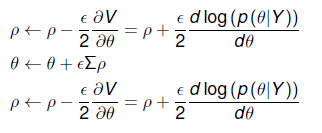

For each HMC iteration repeat this L times to yield the proposal values $\theta^*$ and $\rho^*$

## The Metropolis step:
1. COmpute the ratio

2. Accept/reject step:

3. Since $\rho$ is sampled independently of $\theta$ and previous values of $\rho$ we just discard $\rho^*$ and sample a new values for the next HMC interation

## HMC algorithm parameters:

Parameters that must be set:
- discretization time $ϵ$
- number of leapfrog steps L
- mass $\sum^{-1$}

Sampling efficiency is vary senstive to whose parameters:
- $\epsilon$ too large - too many proposals rejected
- $\epsilon$ - long simulation times
- $L$ too large - too much work for each i
- $L$ too small - devolves to a random walk
- if $\sum^{-1}$ is poorly tuned to the problem, $\epsilon$ need s to be decreased and L increased to maintain precision and efficiency.

!!! NUTS or U-turn sampling

try to find: MD Hoffman and A Gelman.

## HMC issues/limitations:

Requires calculation of the gradien $\frac{d.log(p(\theta|Y))}{d\theta}$

Suitable for sampling of continuous parameters only
- cannot sample discrete parameters
- discrete data is OK as long as the likelihood depends only on continuous parameters.
- models with discrete parameters e.g. finite mixture models, can often be implemented by marginalizing out the discrete parameters.



## Using rstan
rstan is an R package available from CRAN sites, e.g.,
https://cran.r-project.org/
- Contains several R functions for:
    - Translating Stan models to C++,
    - Compiling the resulting C++ code,
    - Analyzing data using the Stan model,
    - Analyzing, summarizing and plotting the resulting MCMC samples.
- We will focus on only a few of those functions—particularly stan().



## linear1

## Linear 2 - Posterior predictive checks PPC

## Hands on 1: PkPd modeling of time everaged biomarker and Pk data

- Data: data/derived/fxa.data.avg.csv
- Version 1
    - Uses linear2 as a template
    - Stan model: model/fxaInhibitAvg1.stan
    - R script: script/fxaInhibitAvg1.R
- Version 2
    - Introduces additional Stan features
    - Vectors and vectorized calculations
    - Additional program blocks: “transformed parameters” and “generated quantities”
    - Stan model: model/fxaInhibitAvg2.stan
    - R script: script/fxaInhibitAvg2.R


## Assessing convergence & adequacy of sample sizes

Early samples may be unrepresenatative of the target distribution

MCMC samples within a chain are autocorelated.
- inferences based on MCMCM samples are less precise than those from the same number of independent samples
- autocorrelation also influecnces the rate of convergence

Use a $warmup$ phase i.e. discard early iterations

Monitor convergence via multiple chains with different starting points
- look for chains to converge to a common distribution
- you want chain history plots to look more like straight horizontal fuzzy caterpillars than wiggy snakes
- monito Gelman-Rubin diagnostics (Rhat) and /or Gelman-Rubin -Brooks plots
    - essentially ratios of total variance to within chain variance
    - should approach 1 for all parameters of interest on convergence




## How many samples
Numbers of samples depends on the inference(s) of interest and the desired precision

For independetnt samples:
- a posterior mean of a parameter $\theta$ is estimated with an error of $\sim \frac{s_{\theta}}{\sqrt{n}}$ where $s_{\theta}$ is the standard deviation of the simulated values of $\theta$ and n-is the number of samples
- a probability p is estimated with an error of $\sim \sqrt{\frac{p(1-p)}{n}}$

Ingeneral more samples arerrequired for estimating tail quantiles and probabilities than for central tendencises and probabilities near 0.5



Given a set of MCMC samples it is possible to adjust for autocorrelation to estimate:
- the equivalent number of independent sample, aka effective sample size(n_eff)
- sthe standard error in the sampled posterior mean
- the rstan rpint and summary functions provide estimated of each

Guidance based on indpendetn samples may then be applied

See Casella e Rober - 2004- 8,7

## Programming hierarchical models (e.g. population models)

Consider the usual case where you want to model 2 levels of variability e.g. inter-individual and residual

The bulk of the data set consissts of aset of equal lenght vectors
- data calues(s) for each observation
- iondividual identifier: use a consecutive sequence of integers
- covariates(dose, time, etc)

May include constants such as numbers of observations and patients, parameters of prior distributions, etc.



## Hierarchical model for dose-response:

E_max model with inter-trial variation in $E_0, E_{max}$

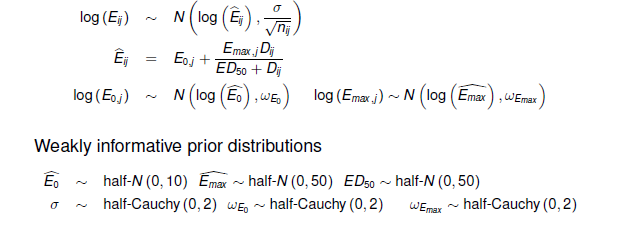

## Demo Hierarchical model for dose-response

DoseResponse.csv

doseResponseMBMA1.R




## INdividual and Population predictions

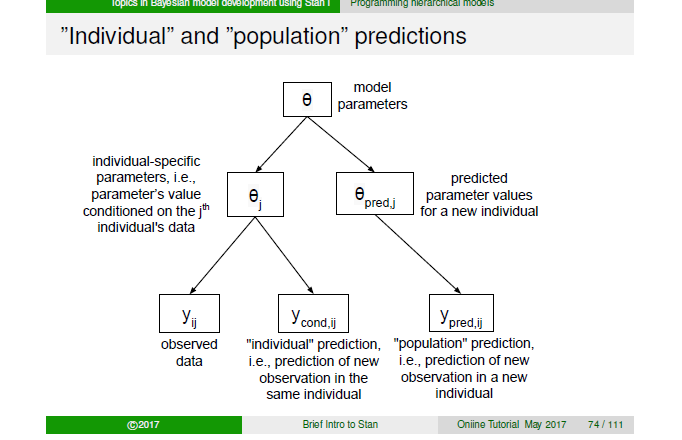

## Prior distributions:

Think of prior distr4ibution as part of the model

Priors should be chosen and subjected to scrutiny much like other model components.

Model checking should ideally include sensitivity analysis of the priors.

Choose of priors ios most critical with sparse or limited data:

See https://github.com/stan-dev/stan/wiki/
## Prior-Choice-Recommendations

## waht is the function of a prior distribution

Represnt prior knowladge

Regularization to facilitate computation
- typically weak moderately informative
- e.g. cauchy with most o its mass in plausible range, byt aheavy tails allow for diagonosis of prior -postrior discrepancies



## What does it mean to be informative, uninformative or weakly informative?

Not well defined, but here's an attempt at some loose definitions:
- weekly informative prior: a prior that tules out unreasonale parameter values but is not so streong as to rule out values that might make sense

- Informative prior:  a prior that purposely represents information intended to influence the posterior distriction
    -- to capture prior knowladge
    - to challenge the analysis with competing points of view, e/g/ use of pessimistic or optimistic priors

Uniformative prior: ostansibly a prior that rep[resents no informative and therfore let's the data tell the story"
- e.g. a constant over the entire real line - an imroper prior



## Beware: That "uninformative" pripor might not be

SUppose you see an improper prior for a standard deviation - aconstant over the positive real line

That means all possitive values are equally likely. SOunds like a reasonable definiton of uniformative doesn't it?

But that means that the prior assigns infinitely more probability ot the set of values greater than any fixed value you care to choose.

This will tend to bias the posterior to high values.

Bottom line: A uniform distribution does not automatically confer uniformativness



## Brief note on truncated distributions:

Truncated priors:
- parameter bounds are sufficient

Truncated distribution fo rderived parameter od data:

Not same as censoring:

## Hand on 2: Population PkPd modeling of time-matched biomarker and Pk data

fxalnhibit1.R

## Programming for pharmacometricians:

Let’s focus on 2 programming tasks:
- Pharmacokinetic compartmental models
- Dosing and observation event schedules

## demo:2 ME-2 single dose PK

- single DosePk1.R

## Recursive approach:
Dealing with dosing and observation event schedules
- data format: time-ordered event records for each individual
- for each event time calculate the amount in each compartment given the compartment amounts plus doses at the previous event time
- this also allows for time-vaying (pieace-wise constant) parameter values

Same approach works for compartmental models descirbed in terms of analytic or numerical solutions



## Demo: Multiple dose Pk with sparse sampling

multiDOsePk1.R

## Hnads on 3

MultiDoseME2PK1Ncp.R

## Dealing with censored data in Stan
The Stan language strongly separates the roles of data and
parameters (random variables).

This has consequences for handling of censored data.
- Observed data are known values and thus true data.
- Censored data are unknown values and thus random variables.

The user must explicitly separate and declare observed and
censored data:
- Observed data in the data block.
- Censored data in the parameters block.
    - Only need to declare censored data if you want to simulate predicted values.
    - Information such as censoring bounds and whether the data is
censored is data that should be declared in the data block.

And also specify different likelihoods for observed and censored
data.

## Demo PL modeling with BLQ data

multiDoseME2PK2.R

## Reference:
[1] Andrew Gelman, John B Carlin, Hal S Stern, David B Dunson, Aki Vehtari, and Donald B
Rubin.
Bayesian Data Analysis.
CRC Press, Boca Raton, FL, third edition, 2014.
[2] Christian P. Robert.
The Bayesian Choice: From Decision-Theoretic Foundations to Computational
Implementation.
Springer, second edition, 2007.
[3] B. P. Carlin and T. A. Louis.
Bayesian Methods for Data Analysis.
Chapman & Hall/CRC, third edition, 2008.
[4] J.O. Berger.
Statistical Decision Theory and Bayesian Analysis.
Springer, second edition, 1993.
[5] D.J. Lunn, A. Thomas, N. Best, and D. Spiegelhalter.
Winbugs – a bayesian modelling framework: concepts, structure, and extensibility.
Statistics and Computing, 10:325–337, 2000.

[6] D. J. Spiegelhalter, K. R. Abrams, and J. P. Myles.
Bayesian Approaches to Clinical Trials and Health-Care Evaluation.
Wiley, 2004.
[7] Christian P. Robert and George Casella.
Introducing Monte Carlo Methods with R.
Springer, 2010.
[8] Christian P. Robert and George Casella.
Monte Carlo Statistical Methods.
Springer, second edition, 2004.
[9] C. Dansirikul, R. G. Morris, S. E. Tett, and S. B. Duffull.
A bayesian approach for population pharmacokinetic modelling of sirolimus.
Br.J Clin.Pharmacol., 62(4):420–434, 2006.
[10] M. G. Dodds and P. Vicini.
Assessing convergence of markov chain monte carlo simulations in hierarchical bayesian
models for population pharmacokinetics.
Ann.Biomed.Eng, 32(9):1300–1313, 2004.